In [30]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

chunk = 'chunk21'


topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = topdir+'sgc_200per_sm_tc_match_part1_really_masked_chunk21.fits'
sim = fits.getdata(fn)

Populating the interactive namespace from numpy and matplotlib


In [2]:

def goot_out_ratio(quantity_in, quantity_out, good_in,bad_out,number, sim = sim):
    mag_in = quantity_in
    mag_out = quantity_out
    sel_good = eval('mag_in'+good_in+str(number))
    mag_good = eval('mag_out'+'[sel_good]')
    sim_good = sim[sel_good]
    sel_bad  = eval('mag_good'+bad_out+str(number))&(sim_good['matched']==True)
    sim_bad = sim_good[sel_bad]
    print(len(sim_good),len(sim_bad),len(sim))
    
    import healpy as hp
    res=256
    npo = 12*res**2
    pixs = np.arange(npo)
    pix_good = hp.ang2pix(res, sim_good['ra'], sim_good['dec'], nest = False, lonlat = True)
    pix_bad = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'], nest = False, lonlat = True)
    ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
    good_arr = np.zeros(npo)
    bad_arr = np.zeros(npo)
    pixs = np.arange(npo)
    for i in range(len(pix_good)):
        n = pix_good[i]
        good_arr[n]+=1
    for i in range(len(pix_bad)):
        n = pix_bad[i]
        bad_arr[n]+=1
    return bad_arr,good_arr,ra,dec
#get good_arr,good_arr        

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


3112 2667 372756


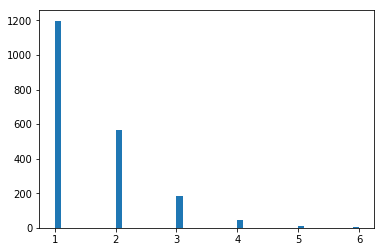

In [19]:
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
bad_arr,good_arr,ra,dec = goot_out_ratio(in_g , out_g, '<', '>', 21.825)
good_arr_new = good_arr[good_arr>0]
p = plt.hist(good_arr_new,bins=50)

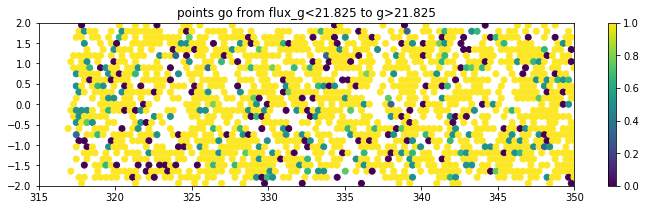

In [13]:
plt.figure(figsize=(12,3))
good_arr_new = good_arr[good_arr>0]
bad_arr_new = bad_arr[good_arr>0]
ra_new = ra[good_arr>0]
dec_new = dec[good_arr>0]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o')
plt.title('points go from flux_g<21.825 to g>21.825')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


55437 7006 372756


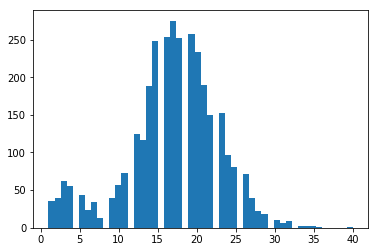

In [3]:
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
bad_arr,good_arr,ra,dec = goot_out_ratio(in_g , out_g, '>', '<', 22.825)
good_arr_new = good_arr[good_arr>0]
p = plt.hist(good_arr_new,bins=50)

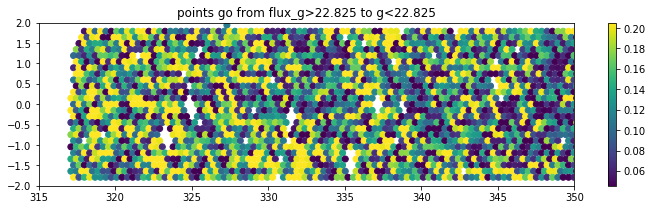

In [8]:
plt.figure(figsize=(12,3))
good_arr_new = good_arr[good_arr>8]
bad_arr_new = bad_arr[good_arr>8]
ra_new = ra[good_arr>8]
dec_new = dec[good_arr>8]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean+std,vmin=mean-std)
plt.title('points go from flux_g>22.825 to g<22.825')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()

In [14]:
2667/3112

0.8570051413881749

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


76348 23973 372756


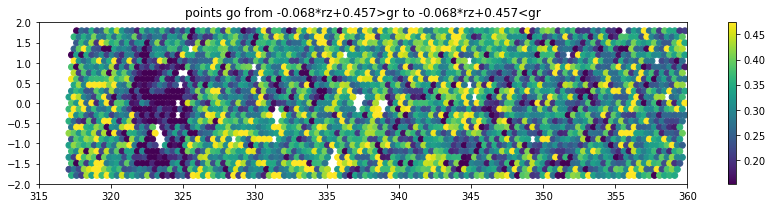

In [31]:
#-0.068*rz+0.457-gr<0
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = -0.068*(in_r-in_z)+0.457-(in_g-in_r)
OUTPUT = -0.068*(out_r-out_z)+0.457-(out_g-out_r)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '>=', '<', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 10
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>10]
bad_arr_new = bad_arr[good_arr>10]
ra_new = ra[good_arr>10]
dec_new = dec[good_arr>10]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from -0.068*rz+0.457>gr to -0.068*rz+0.457<gr')
plt.gca().set_xlim((315,360))
plt.gca().set_ylim((-2,2))
plt.colorbar()
plt.tight_layout()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


29919 3409 372756


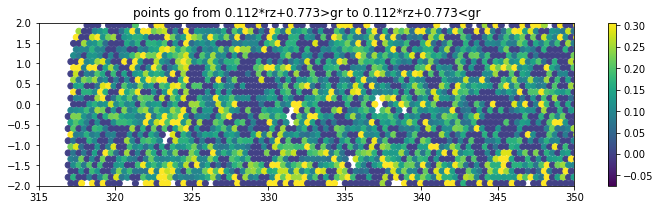

In [24]:
#0.112*rz+0.773-gr>0
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = 0.112*(in_r-in_z)+0.773-(in_g-in_r)
OUTPUT = 0.112*(out_r-out_z)+0.773-(out_g-out_r)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '<=', '>', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 70
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>0]
bad_arr_new = bad_arr[good_arr>0]
ra_new = ra[good_arr>0]
dec_new = dec[good_arr>0]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from 0.112*rz+0.773>gr to 0.112*rz+0.773<gr')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


46996 8169 372756


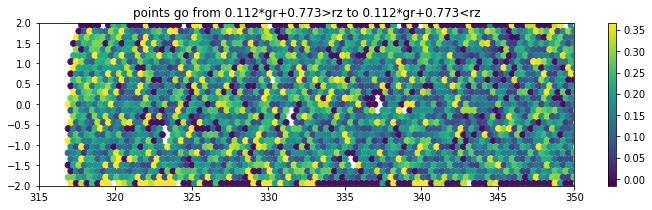

In [27]:
#(0.218*gr+0.571-rz<0)
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = 0.218*(in_g-in_r)+0.571-(in_r-in_z)
OUTPUT = 0.218*(out_g-out_r)+0.571-(out_r-out_z)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '>', '<=', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>0]
bad_arr_new = bad_arr[good_arr>0]
ra_new = ra[good_arr>0]
dec_new = dec[good_arr>0]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from 0.112*gr+0.773>rz to 0.112*gr+0.773<rz')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()




/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


14231 1617 372756


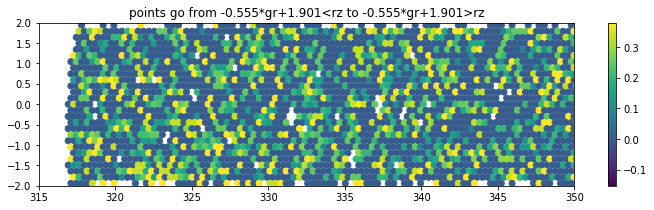

In [30]:
#(-0.555*gr+1.901-rz>0)
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = -0.555*(in_g-in_r)+1.901-(in_r-in_z)
OUTPUT = -0.555*(out_g-out_r)+1.901-(out_r-out_z)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '<', '>=', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>0]
bad_arr_new = bad_arr[good_arr>0]
ra_new = ra[good_arr>0]
dec_new = dec[good_arr>0]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from -0.555*gr+1.901<rz to -0.555*gr+1.901>rz')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()

In [38]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [37]:
low = [i*3+317 for i in range(14)]
high = [(i+1)*3+317 for i in range(14)]

In [63]:
ratio_list = []
g_high = 22.825
g_low = 21.825
mwg_list = []
ratio2_list = []
for i in range(14):
    print(i)
    sim_one = sim[(sim['ra']>low[i])&(sim['ra']<high[i])][:24000]
    sim_mean = sim_one['mw_transmission_g'].mean()
    flux_g_low = 10**((-g_high+22.5)/2.5)*sim_mean
    flux_g_high = 10**((-g_low+22.5)/2.5)*sim_mean
    
    n1 = len(sim_one[(sim_one['flux_g']>flux_g_low)&(sim_one['flux_g']<flux_g_high)])
    n2 = len(sim_one[(sim_one['sim_gflux']>flux_g_low)&(sim_one['sim_gflux']<flux_g_high)])
    mwg_list.append(sim_mean)
    ratio_list.append(n1/n2)
    
    u1 = len(sim[(sim['flux_g']>flux_g_low)&(sim['flux_g']<flux_g_high)])
    u2 = len(sim[(sim['sim_gflux']>flux_g_low)&(sim['sim_gflux']<flux_g_high)])
    ratio2_list.append(u1/u2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [64]:
medium = np.array([(i+0.5)*3+317 for i in range(14)])
ratio_list = np.array(ratio_list)
mwg_list = np.array(mwg_list)
ratio2_list = np.array(ratio2_list)


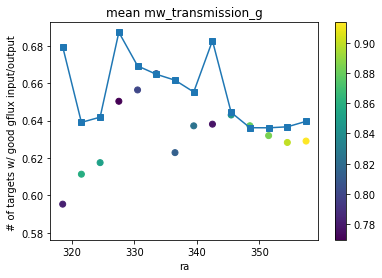

In [71]:
plt.scatter(medium, ratio_list,c = mwg_list)
plt.plot(medium, ratio2_list,marker = 's')
plt.xlabel('ra')
plt.ylabel('# of targets w/ good gflux input/output ')
plt.title('mean mw_transmission_g')
plt.colorbar()

Text(0,0.5,'# of targets w/ good gflux input/output')

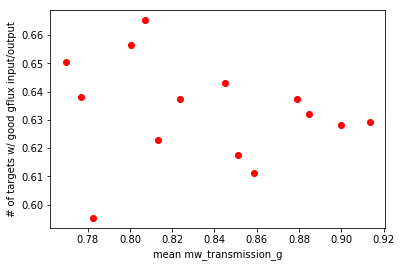

In [61]:
plt.plot(mwg_list, ratio_list, 'ro')
plt.xlabel('mean mw_transmission_g')
plt.ylabel('# of targets w/ good gflux input/output')

In [51]:
ratio_list

array([ 0.59527851,  0.61132399,  0.61751246,  0.65037029,  0.65644237,
        0.66519566,  0.62287449,  0.63721892,  0.63811323,  0.64301967,
        0.63727063,  0.63198352,  0.62831458,  0.62906233])

In [52]:
mwg_list

array([ 0.78235269,  0.85865688,  0.85122752,  0.76957732,  0.80048323,
        0.80727732,  0.81317133,  0.82369906,  0.77705723,  0.84503627,
        0.87919289,  0.88468182,  0.89970052,  0.91362172], dtype=float32)

In [ ]:
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])

(-1, 1)

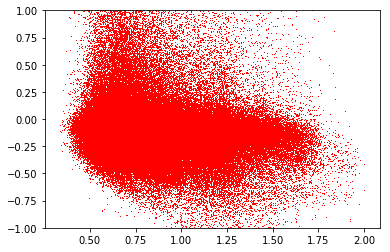

In [83]:
plt.plot(sim['sim_gflux'], sim['flux_g']-sim['sim_gflux'],'r,')
plt.gca().set_ylim((-1,1))

In [82]:
(sim['flux_g']-sim['sim_gflux']).mean(),(sim['flux_g']-sim['sim_gflux']).std()

(0.69577519913233832, 15.419575976998225)

In [85]:
22.5 - 2.5 * np.log10(1.2 / 0.9)

22.18765315847925

In [86]:
22.5 - 2.5 * np.log10(0.2 / 0.9)

24.13303128443836

In [87]:
22.5 - 2.5 * np.log10(2.2 / 0.9)

21.529549571542795

In [88]:
true_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['mw_transmission_g'])
measure_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


(18, 25)

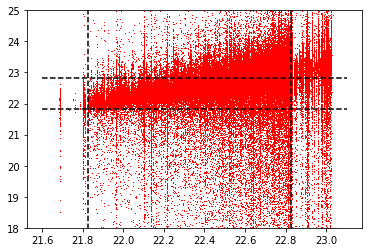

In [93]:
plt.plot(true_g,measure_g,'r,')
u1 = 21.825
u2 = 22.825
y = np.arange(12.5,30,0.1)
x = np.ones(len(y))*21.825
x2 = np.ones(len(y))*22.825
plt.plot(x,y,'k--')
plt.plot(x2,y,'k--')
x = np.arange(21.6,23.2,0.1)
y = np.ones(len(x))*21.825
y2 = np.ones(len(x))*22.825
plt.plot(x,y,'k--')
plt.plot(x,y2,'k--')
plt.gca().set_ylim(18,25)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


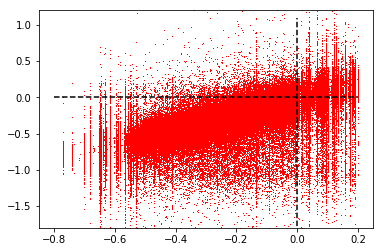

In [96]:
#-0.068*rz+0.457 - gr < 0 
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])

x = -0.068*(in_r-in_z)+0.457-(in_g-in_r)
y = -0.068*(out_r-out_z)+0.457-(out_g-out_r)
plt.plot(x,y,'r,')
plt.gca().set_ylim((-1.8,1.2))
y = np.arange(-2,1.2,0.1)
x = np.zeros(len(y))
plt.plot(x, y, 'k--')
x = np.arange(-0.8,0.3,0.1)
y = np.zeros(len(x))
plt.plot(x, y, 'k--')

In [97]:
sim['sim_rhalf']

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'fracdev'; format = 'E'
    name = 'shapeexp_r'; format = 'E'
    name = 'shapedev_r'; format = 'E'
    name = 'shapeexp_e1'; format = 'E'
    name = 'shapeexp_e2'; format = 'E'
    name = 'shapedev_e1'; format = 'E'
    name = 'shapedev_e2'; format = 'E'
    name = 'sim_id'; format = 'J'
    name = 'sim_gflux'; format = 'D'
    name = 'sim_rflux'; format = 'D'
    name = 'sim_zflux'; format = 'D'
    name = 'sim_mw_transmission_g'; format = 'E'
    name = 'sim_mw_transmission_r'; format = 'E'
    name = 'sim_mw_transmission_z'; format = 'E'
    name = 'sim_rhalf'; format = 'D'
    name = 'sim_n'; format = 'D'
    name = 'sim_e1'; format = 'D'
    name = 'sim_e2'; format = 

In [121]:
import healpy as hp
res=256
npo = 12*res**2
pix = hp.ang2pix(res, sim['ra'], sim['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
tot_num = np.zeros(npo)
rhalf_ratio = np.zeros(npo)
for i in range(len(pix)):
        n = pix[i]
        tot_num[n]+=1
        tot_rhalf=sim['sim_rhalf'][i]
        if sim['fracdev'][i]<0.5:
            tot_out_half=sim['shapeexp_r'][i]
        else:
            tot_out_half=sim['shapedev_r'][i]
        rhalf_ratio[n]+=tot_out_half/tot_rhalf

In [122]:
tot_num_new = tot_num[tot_num>80]
rhalf_ratio_new = rhalf_ratio[tot_num>80]
ra_new = ra[tot_num>80]
dec_new = dec[tot_num>80]

Text(0.5,1,'output/input fwhm')

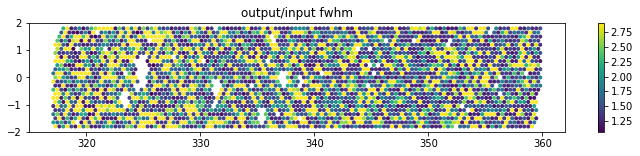

In [127]:
plt.figure(figsize=(12,2))
mean = (tot_out_half_new/tot_rhalf_new).mean()
std = (tot_out_half_new/tot_rhalf_new).std()
plt.scatter(ra_new,dec_new,c= rhalf_ratio_new/tot_num_new , marker = '.',\
            vmax = mean+std,vmin=mean-std)
plt.colorbar()
plt.title('output/input fwhm')

In [10]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'dr3_elgs_really_masked_chunk21.fits'
DDAT = fits.getdata(topdir+fn)

(array([  6.39300000e+03,   9.51200000e+03,   4.89600000e+03,
          8.38400000e+03,   4.67900000e+03,   1.99900000e+03,
          8.44000000e+02,   4.14000000e+02,   1.98000000e+02,
          1.19000000e+02,   6.50000000e+01,   2.60000000e+01,
          4.40000000e+01,   2.50000000e+01,   1.60000000e+01,
          1.20000000e+01,   1.20000000e+01,   8.00000000e+00,
          1.20000000e+01,   8.00000000e+00]),
 array([ 0.        ,  0.24961116,  0.49922233,  0.74883349,  0.99844465,
         1.24805582,  1.49766698,  1.74727814,  1.99688931,  2.24650047,
         2.49611163,  2.74572279,  2.99533396,  3.24494512,  3.49455628,
         3.74416745,  3.99377861,  4.24338977,  4.49300094,  4.7426121 ,
         4.99222326]),
 <a list of 20 Patch objects>)

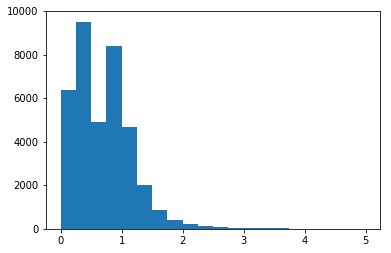

In [14]:
plt.hist(DDAT[DDAT['shapeExp_r']<5]['shapeExp_r'],bins=20)

Text(0.5,1,'fwhm real ELGs')

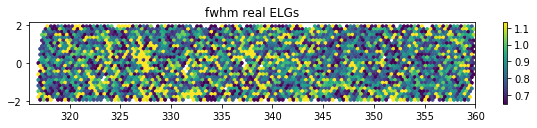

In [34]:
import healpy as hp
DAT = DDAT[(DDAT['shapeExp_r']<5)&(DDAT['shapeDev_r']<5)]
res=256
npo = 12*res**2
pixs=np.arange(npo)
pix = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
tot_num = np.zeros(npo)
rhalf_ratio = np.zeros(npo)
for i in range(len(pix)):
        n = pix[i]
        tot_num[n]+=1
        if DAT['fracDev'][i]<0.5:
            tot_out_half=DAT['shapeExp_r'][i]
        else:
            tot_out_half=DAT['shapeDev_r'][i]
        rhalf_ratio[n]+=tot_out_half
        
tot_num_new = tot_num[tot_num>0]
rhalf_ratio_new = rhalf_ratio[tot_num>0]
ra_new = ra[tot_num>0]
dec_new = dec[tot_num>0]

plt.figure(figsize=(10,1.5))
mean = (rhalf_ratio_new/tot_num_new).mean()
std = (rhalf_ratio_new/tot_num_new).std()
plt.scatter(ra_new,dec_new,c= rhalf_ratio_new/tot_num_new , marker = '.',vmax = mean+std,vmin=mean-std)
plt.colorbar()
plt.gca().set_xlim((316,360))
plt.title('fwhm real ELGs')

Text(0.5,1,'rhalf obiwan ELGs')

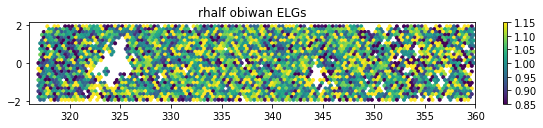

In [73]:
fn = 'sgc_run_obiwan_dr3_matched_really_masked_chunk21.fits'
DAT = fits.getdata(topdir+fn)
DAT = DAT[(DAT['shapeExp_r']<5)&(DAT['shapeDev_r']<5)]
import healpy as hp
res=256
npo = 12*res**2
pixs=np.arange(npo)
pix = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
tot_num = np.zeros(npo)
rhalf_ratio = np.zeros(npo)
for i in range(len(pix)):
        n = pix[i]
        tot_num[n]+=1
        if DAT['fracdev'][i]<0.5:
            tot_out_half=DAT['shapeexp_r'][i]
        else:
            tot_out_half=DAT['shapedev_r'][i]
        rhalf_ratio[n]+=tot_out_half
        
tot_num_new = tot_num[tot_num>0]
rhalf_ratio_new = rhalf_ratio[tot_num>0]
ra_new = ra[tot_num>0]
dec_new = dec[tot_num>0]

plt.figure(figsize=(10,1.5))
mean = (rhalf_ratio_new/tot_num_new).mean()
std = (rhalf_ratio_new/tot_num_new).std()
plt.scatter(ra_new,dec_new,c= rhalf_ratio_new/tot_num_new , marker = '.',\
            vmax = 1.15,vmin= 0.85)
plt.colorbar()
plt.gca().set_xlim((316,360))
plt.title('rhalf obiwan ELGs')

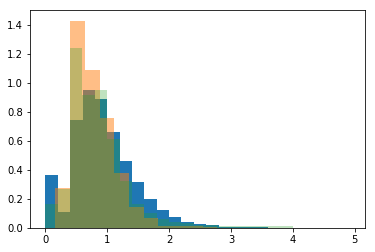

In [72]:
DAT = DAT[(DAT['shapeExp_r']<4)&(DAT['shapeDev_r']<4)]
a,bins,b = plt.hist(DAT['shapeExp_r'],bins=20,normed = True)
a,bins,b = plt.hist(DAT['sim_rhalf'],bins=20,alpha = 0.5,normed = True)
dat = DDAT[(DDAT['shapeExp_r']<4)&(DDAT['shapeDev_r']<4)]
dat1 = np.hstack((dat[dat['fracdev']<0.5]['shapeExp_r'],dat[dat['fracdev']>0.5]['shapeDev_r']))
a,bins,b = plt.hist(dat1,bins=20,alpha = 0.3,normed = True)

array([ 0.71550828,  1.21208084,  0.65108222, ...,  0.87633908,
        0.44999999,  0.82349586], dtype=float32)

In [58]:
DAT.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'fracdev'; format = 'E'
    name = 'shapeexp_r'; format = 'E'
    name = 'shapedev_r'; format = 'E'
    name = 'shapeexp_e1'; format = 'E'
    name = 'shapeexp_e2'; format = 'E'
    name = 'shapedev_e1'; format = 'E'
    name = 'shapedev_e2'; format = 'E'
    name = 'sim_id'; format = 'J'
    name = 'sim_gflux'; format = 'D'
    name = 'sim_rflux'; format = 'D'
    name = 'sim_zflux'; format = 'D'
    name = 'sim_mw_transmission_g'; format = 'E'
    name = 'sim_mw_transmission_r'; format = 'E'
    name = 'sim_mw_transmission_z'; format = 'E'
    name = 'sim_rhalf'; format = 'D'
    name = 'sim_n'; format = 'D'
    name = 'sim_e1'; format = 'D'
    name = 'sim_e2'; format = 

Text(0.5,1,'fwhm obiwan ELGs')

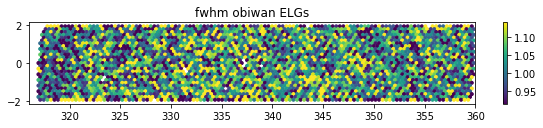

In [52]:
fn = 'sgc_run_obiwan_really_masked_chunk21.fits'
DAT = fits.getdata(topdir+fn)
DAT = DAT[(DAT['shapeExp_r']<5)&(DAT['shapeDev_r']<5)]
import healpy as hp
res=256
npo = 12*res**2
pixs=np.arange(npo)
pix = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
tot_num = np.zeros(npo)
rhalf_ratio = np.zeros(npo)
for i in range(len(pix)):
        n = pix[i]
        tot_num[n]+=1
        if DAT['fracdev'][i]<0.5:
            tot_out_half=DAT['shapeexp_r'][i]
        else:
            tot_out_half=DAT['shapedev_r'][i]
        rhalf_ratio[n]+=tot_out_half
        
tot_num_new = tot_num[tot_num>0]
rhalf_ratio_new = rhalf_ratio[tot_num>0]
ra_new = ra[tot_num>0]
dec_new = dec[tot_num>0]

plt.figure(figsize=(10,1.5))
mean = (rhalf_ratio_new/tot_num_new).mean()
std = (rhalf_ratio_new/tot_num_new).std()
plt.scatter(ra_new,dec_new,c= rhalf_ratio_new/tot_num_new , marker = '.',\
            vmax = mean+std,vmin= mean-std)
plt.colorbar()
plt.gca().set_xlim((316,360))
plt.title('fwhm obiwan ELGs')

(array([  4.65903672e-01,   7.14278097e-01,   6.30260361e-01,
          2.62495291e-01,   8.78380101e-02,   2.77889581e-02,
          8.09332181e-03,   3.08451775e-03,   7.64054856e-04,
          4.24474920e-04,   1.98088296e-04,   8.48949840e-05,
          0.00000000e+00,   2.82983280e-05,   2.82983280e-05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.82983280e-05,   2.82983280e-05]),
 array([ 0.        ,  0.45427146,  0.90854292,  1.36281438,  1.81708584,
         2.2713573 ,  2.72562876,  3.17990022,  3.63417168,  4.08844314,
         4.5427146 ,  4.99698606,  5.45125751,  5.90552897,  6.35980043,
         6.81407189,  7.26834335,  7.72261481,  8.17688627,  8.63115773,
         9.08542919]),
 <a list of 20 Patch objects>)

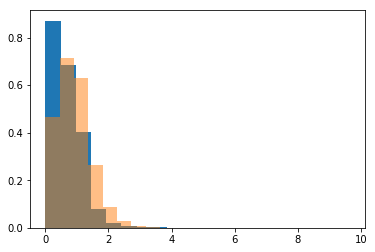

In [18]:
plt.hist(DDAT[DDAT['shapeExp_r']<10]['shapeExp_r'],bins=20,normed = True)
plt.hist(DAT[DAT['shapeExp_r']<10]['shapeExp_r'],bins=20,normed = True,alpha=0.5)

In [45]:
DDAT['shapeExp_r'].mean(),DAT['shapeExp_r'].mean(),DDAT['shapeExp_r'].max(),\
DAT['shapeExp_r'].max(),len(DDAT[DDAT['shapeExp_r']>5])/len(DDAT),len(DAT[DAT['shapeExp_r']>5])/len(DAT)\
,len(DDAT[DDAT['shapeExp_r']>3])

DDAT[DDAT['shapeExp_r']<5]['shapeExp_r'].mean(),DAT[DAT['shapeExp_r']<5]['shapeExp_r'].mean(),len(DDAT)

(0.69448286, 0.72748429, 38313)

In [47]:
DAT.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'fracdev'; format = 'E'
    name = 'shapeexp_r'; format = 'E'
    name = 'shapedev_r'; format = 'E'
    name = 'shapeexp_e1'; format = 'E'
    name = 'shapeexp_e2'; format = 'E'
    name = 'shapedev_e1'; format = 'E'
    name = 'shapedev_e2'; format = 'E'
    name = 'sim_id'; format = 'J'
    name = 'sim_gflux'; format = 'D'
    name = 'sim_rflux'; format = 'D'
    name = 'sim_zflux'; format = 'D'
    name = 'sim_mw_transmission_g'; format = 'E'
    name = 'sim_mw_transmission_r'; format = 'E'
    name = 'sim_mw_transmission_z'; format = 'E'
    name = 'sim_rhalf'; format = 'D'
    name = 'sim_n'; format = 'D'
    name = 'sim_e1'; format = 'D'
    name = 'sim_e2'; format = 

In [46]:
fn = 'sgc_run_obiwan_dr3_matched_really_masked_chunk21.fits'
DAT = fits.getdata(topdir+fn)
import healpy as hp
res=256
npo = 12*res**2
pixs=np.arange(npo)
pix = hp.ang2pix(res, DAT['ra'], DAT['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
tot_num = np.zeros(npo)
rhalf_ratio = np.zeros(npo)
for i in range(len(pix)):
        n = pix[i]
        tot_num[n]+=1
        if DAT['fracdev'][i]<0.5:
            tot_out_half=DAT['sim_r_half'][i]
        rhalf_ratio[n]+=tot_out_half
        
tot_num_new = tot_num[tot_num>0]
rhalf_ratio_new = rhalf_ratio[tot_num>0]
ra_new = ra[tot_num>0]
dec_new = dec[tot_num>0]

plt.figure(figsize=(10,1.5))
mean = (tot_out_half_new/tot_rhalf_new).mean()
std = (tot_out_half_new/tot_rhalf_new).std()
plt.scatter(ra_new,dec_new,c= rhalf_ratio_new/tot_num_new , marker = '.',\
            vmax = 1.2,vmin= 0.8)
plt.colorbar()
plt.gca().set_xlim((316,360))
plt.title('fwhm obiwan ELGs')

KeyError: "Key 'sim_r_half' does not exist."

In [307]:
DAT.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'flux_r'; format = 'E'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'fracdev'; format = 'E'
    name = 'shapeexp_r'; format = 'E'
    name = 'shapedev_r'; format = 'E'
    name = 'shapeexp_e1'; format = 'E'
    name = 'shapeexp_e2'; format = 'E'
    name = 'shapedev_e1'; format = 'E'
    name = 'shapedev_e2'; format = 'E'
    name = 'sim_id'; format = 'J'
    name = 'sim_gflux'; format = 'D'
    name = 'sim_rflux'; format = 'D'
    name = 'sim_zflux'; format = 'D'
    name = 'sim_mw_transmission_g'; format = 'E'
    name = 'sim_mw_transmission_r'; format = 'E'
    name = 'sim_mw_transmission_z'; format = 'E'
    name = 'sim_rhalf'; format = 'D'
    name = 'sim_n'; format = 'D'
    name = 'sim_e1'; format = 'D'
    name = 'sim_e2'; format = 

0.23487393155223119

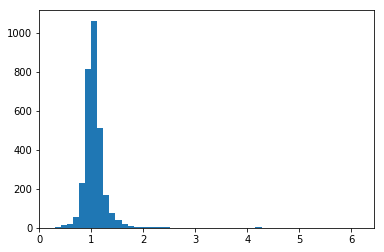

In [295]:
p=plt.hist(rhalf_ratio_new/tot_num_new,bins=50)
(rhalf_ratio_new/tot_num_new).mean()
(rhalf_ratio_new/tot_num_new).std()

In [257]:
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
len(ra),npo

(786432, 196608)

In [245]:
tot_num[tot_num>0]

array([ 3.,  4.,  1., ...,  2.,  7.,  1.])

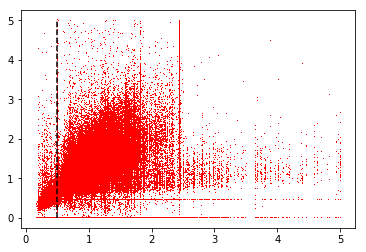

In [185]:
sim_updated = sim[sim['shapeexp_r']<5]
#plt.hexbin(sim_updated['sim_rhalf'],sim_updated['shapeexp_r'],vmax = 1000)
plt.plot(sim_updated['sim_rhalf'],sim_updated['shapeexp_r'],'r,')
#plt.gca().set_ylim((0,4))
x = [0,1,2,3,4,5]
plt.plot([0.5]*6,x,'k--')

In [153]:
sim_updated['shapeexp_r'].mean()

0.91790628

In [155]:
sim_updated['sim_rhalf'].mean()

0.88213202804681745

(0, 3)

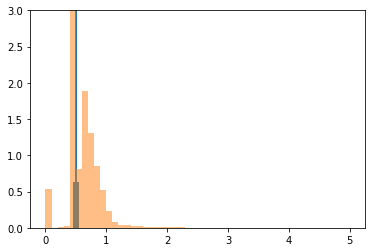

In [193]:
p=plt.hist(sim_updated[(sim_updated['sim_rhalf']<0.55)&(sim_updated['sim_rhalf']>0.45)]['sim_rhalf'],bins=3,normed=True)
p=plt.hist(sim_updated[(sim_updated['sim_rhalf']<0.55)&(sim_updated['sim_rhalf']>0.45)]['shapeexp_r'],bins=50,alpha=0.5,normed=True)
plt.gca().set_ylim((0,3))

In [172]:
sim_updated[sim_updated['sim_rhalf']<1.7]['shapeexp_r'].mean()

0.8831374

In [173]:
sim_updated['sim_rhalf'].mean()

0.88213202804681745

In [180]:
sim_updated[sim_updated['sim_rhalf']<0.5]['sim_rhalf']

array([ 0.25487548,  0.29238981,  0.28651622, ...,  0.19360206,
        0.39639506,  0.42315519])

In [227]:
dat = sim[(sim['sim_rhalf']<0.55)&(sim['sim_rhalf']>0.45)]

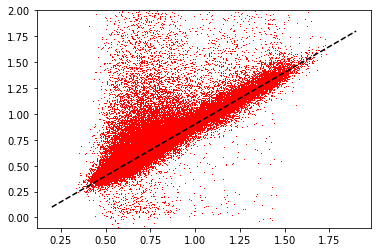

In [230]:
plt.plot(dat['sim_gflux'],dat['flux_g'],'r,')
plt.gca().set_ylim((-0.1,2))
x = np.arange(0.2,2,0.1)
plt.plot(x,x-0.1,'k--')

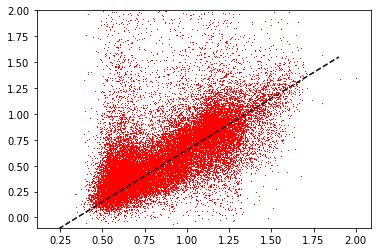

In [231]:
dat = sim[(sim['sim_rhalf']<3)&(sim['sim_rhalf']>1.5)]
plt.plot(dat['sim_gflux'],dat['flux_g'],'r,')
plt.gca().set_ylim((-0.1,2))
x = np.arange(0.2,2,0.1)
plt.plot(x,x-0.35,'k--')

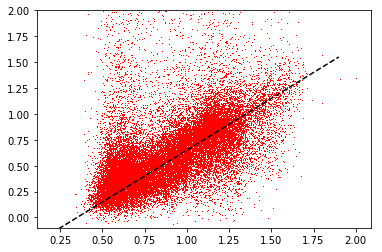

In [224]:
dat = sim[(sim['sim_rhalf']>1.5)]
plt.plot(dat['sim_gflux'],dat['flux_g'],'r,')
plt.gca().set_ylim((-0.1,2))
x = np.arange(0.2,2,0.1)
plt.plot(x,x-0.35,'k--')

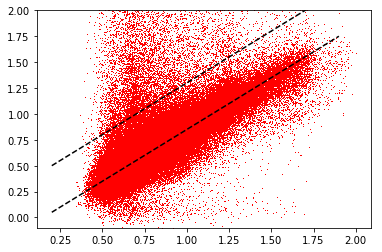

In [266]:
dat = sim[(sim['sim_rhalf']<1.5)&(sim['sim_rhalf']>0.55)]
plt.plot(dat['sim_gflux'],dat['flux_g'],'r,')
plt.gca().set_ylim((-0.1,2))
x = np.arange(0.2,2,0.1)
plt.plot(x,x-0.15,'k--')
plt.plot(x,x+0.3,'k--')

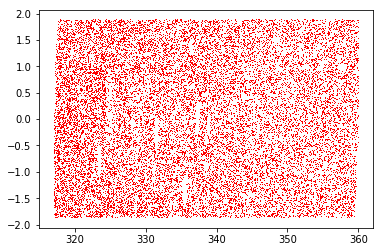

In [270]:
dat = sim[(sim['flux_g']-sim['sim_gflux']>0.4)]
plt.plot(dat['ra'],dat['dec'],'r,')

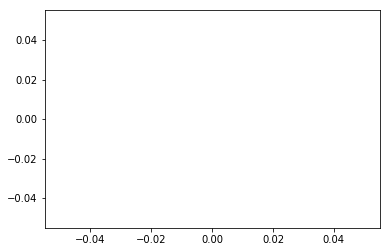

In [274]:
dat = DAT[(DAT['decam_flux'].transpose()[1]>2)]
plt.plot(dat['ra'],dat['dec'],'r,')

In [275]:
DAT['decam_flux'].transpose()[1]

array([ 0.62094694,  1.15172207,  0.63600123, ...,  1.20422542,
        0.73455691,  1.42900622], dtype=float32)

(array([   358.,   7069.,  12703.,   7271.,   4243.,   2759.,   1837.,
          1241.,    696.,    136.]),
 array([ 0.40790769,  0.5410275 ,  0.6741473 ,  0.8072671 ,  0.9403869 ,
         1.0735067 ,  1.2066265 ,  1.3397463 ,  1.4728661 ,  1.6059859 ,
         1.7391057 ]),
 <a list of 10 Patch objects>)

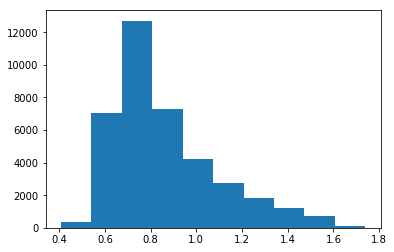

In [276]:
plt.hist(DAT['decam_flux'].transpose()[1])